<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/fastquant/SMAeRSIBitcoinDaytraderMaio2021adezembro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtest usando fastquant

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 1.2 MB/s 
     |████████████████████████████████| 156 kB 49.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.4 MB/s 
     |████████████████████████████████| 2.2 MB 23.3 MB/s 
     |████████████████████████████████| 503 kB 46.1 MB/s 
     |████████████████████████████████| 410 kB 53.1 MB/s 
     |████████████████████████████████| 138 kB 49.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 191 kB 36.6 MB/s 
     |████████████████████████████████| 6.3 MB 13.9 MB/s 
     |████████████████████████████████| 843 kB 42.3 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 3.6 MB 14.2 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 160 kB 47.0 MB/s 
     |████████████████████████████████| 291 kB 52.0 MB/s 
     |████████████████████████████████| 192 kB 52.9 MB/s 
     |███████████

#Pega dados da Binance

In [35]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2021-05-15", 
                         "2021-12-10",
                         time_resolution='1d'
                        )

In [36]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-12-06,49396.32,50891.11,47100.00,50441.92,58571.21575
2021-12-07,50441.91,51936.33,50039.74,50588.95,38253.46877
2021-12-08,50588.95,51200.00,48600.00,50471.19,38425.92466
2021-12-09,50471.19,50797.76,47320.00,47545.59,37692.68665
2021-12-10,47535.90,50125.00,46852.00,47140.54,44233.57391


#Executando Backtesting com conjunto de valores

In [37]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [38]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,1,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,45,0.242450,0.001155,0.337684,33.768441,32,10.929104,15636.64,"{'len': 38, 'drawdown': 14.865390771450187, 'm...",14.865391,38,None,27436.76,127436.76,2,1.0,2,0,13718.380000,13.718380,0.000,0.000000,16471.04,16.47104,0.00,0.00000
1,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,0.217380,0.001035,0.298041,29.804088,32,15.361933,22557.30,"{'len': 38, 'drawdown': 15.361933285544014, 'm...",15.361933,38,None,24281.64,124281.64,3,1.0,3,0,8093.880000,8.093880,0.000,0.000000,16209.86,16.20986,0.00,0.00000
2,12,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,0.214113,0.001020,0.292961,29.296120,32,17.443230,26173.52,"{'len': 38, 'drawdown': 17.4432303210409, 'mon...",17.443230,38,None,23876.21,123876.21,10,0.6,6,4,7669.811667,7.669812,-5535.665,-5.535665,16304.32,16.30432,-7629.48,-7.62948
3,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,0.178180,0.000848,0.238395,23.839526,32,14.809812,20775.08,"{'len': 38, 'drawdown': 18.874021988091968, 'm...",18.874022,38,None,19504.08,119504.08,2,1.0,2,0,9752.040000,9.752040,0.000,0.000000,11332.60,11.33260,0.00,0.00000
4,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,21,75,0.176859,0.000842,0.236433,23.643347,32,23.301906,36259.00,"{'len': 32, 'drawdown': 23.615339580335625, 'm...",23.615340,32,None,19346.30,119346.30,1,1.0,1,0,19346.300000,19.346300,0.000,0.000000,19346.30,19.34630,0.00,0.00000


In [39]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 45)

#Roda o Backtest usando os valores ótimos encontrados anteriormente

In [40]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

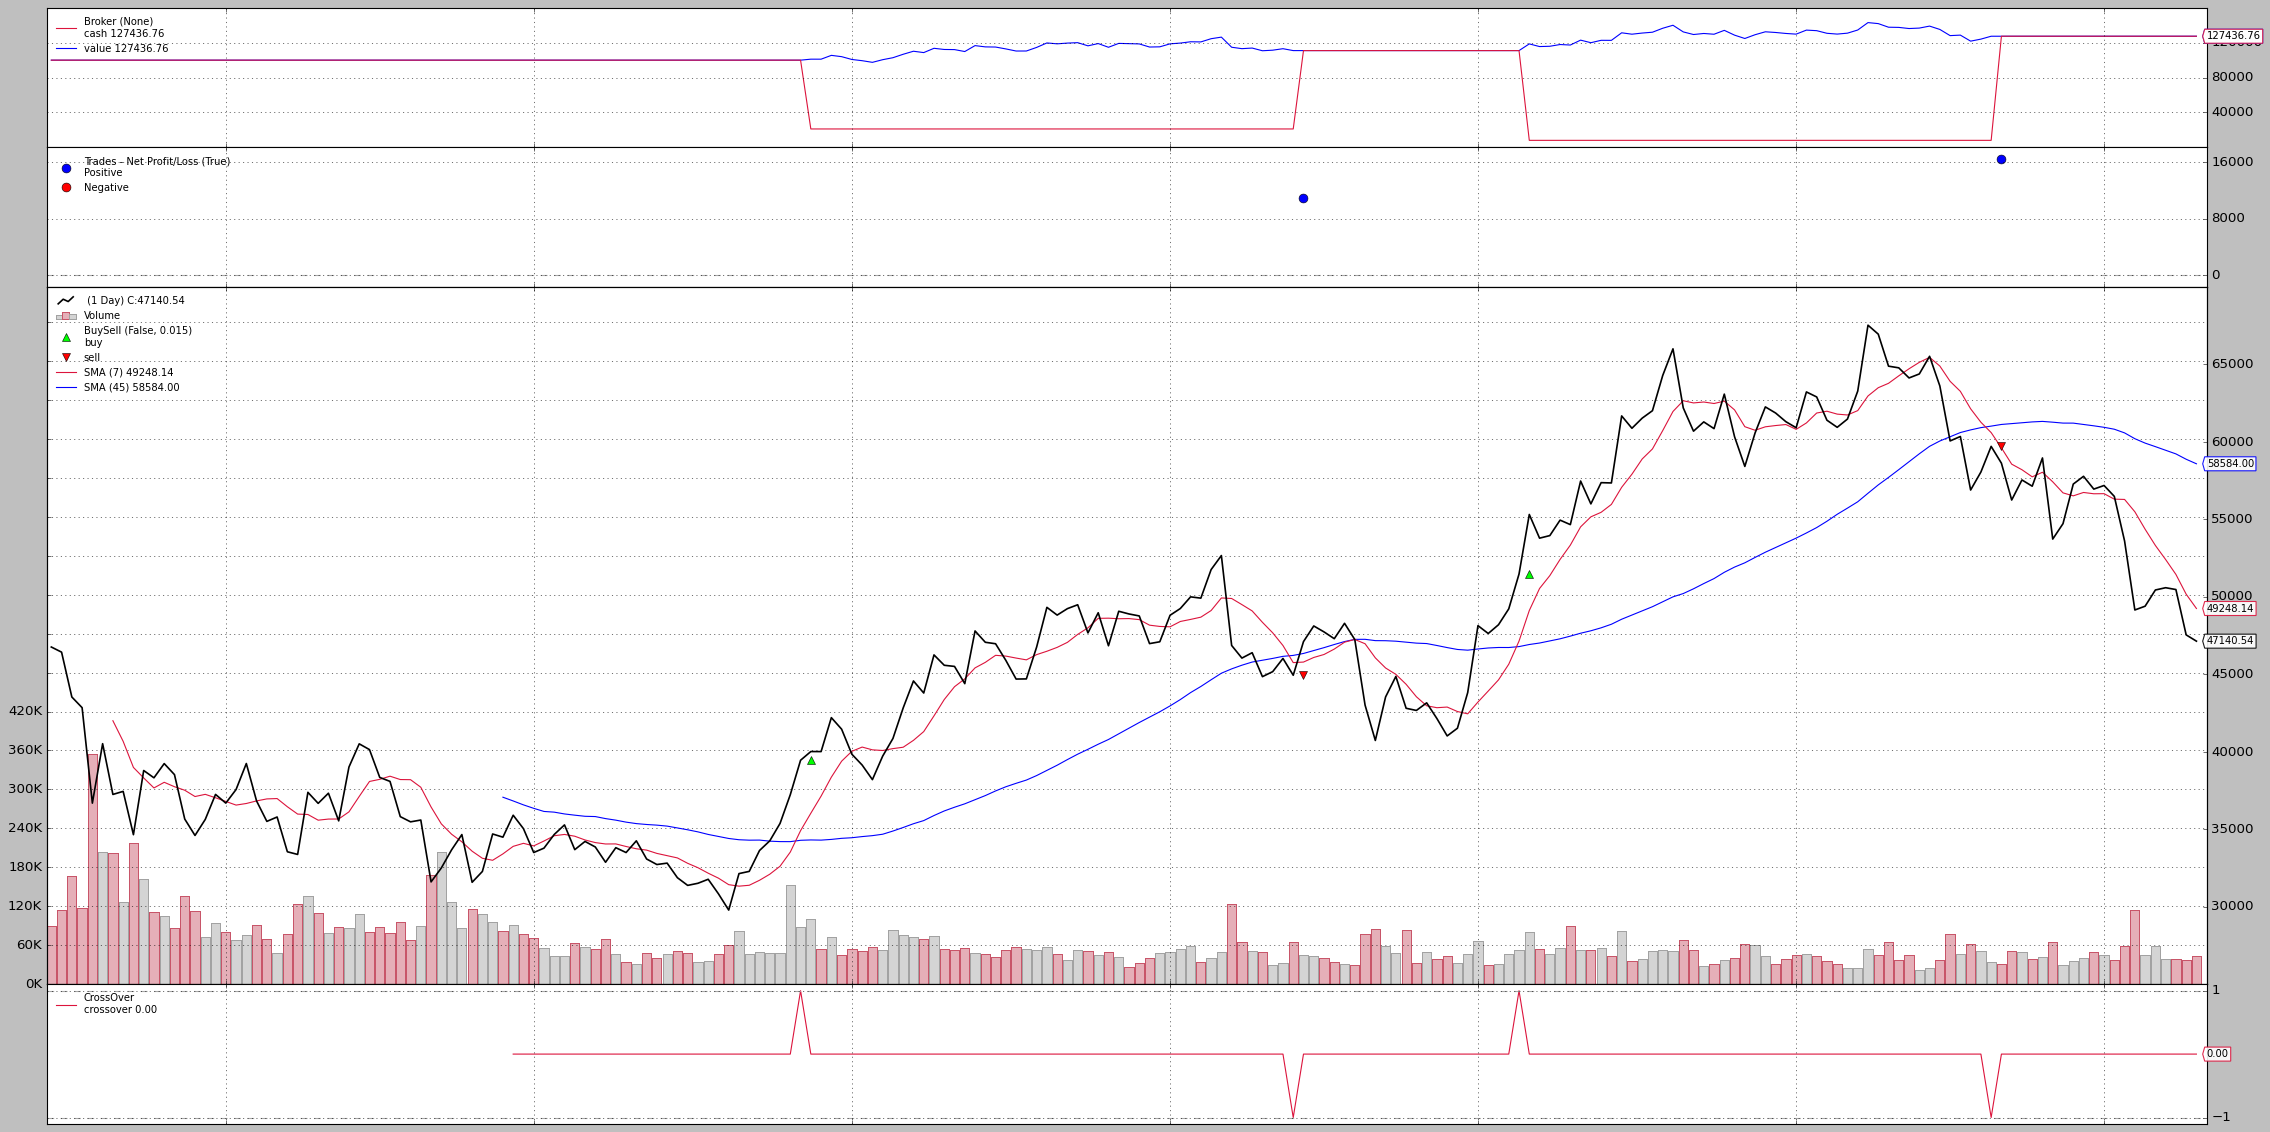

In [42]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

#Acessando histórico de transações
Isso é feito definindo return_history = True.

##Estratégia Simples

In [46]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [47]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,45,0.24245,0.001155,0.337684,33.768441,32,10.929104,15636.64,"{'len': 38, 'drawdown': 14.865390771450187, 'm...",14.865391,38,None,27436.76,127436.76,2,1.0,2,0,13718.38,13.71838,0.0,0.0,16471.04,16.47104,0.0,0.0


 melhor ROI é de 27,43%

In [48]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [49]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period45,2021-07-28,buy,39457.87,2,78915.74,0.0,0.00
1,0,fast_period7_slow_period45,2021-09-14,sell,44940.73,-2,78915.74,0.0,10965.72
2,0,fast_period7_slow_period45,2021-10-06,buy,51471.99,2,102943.98,0.0,0.00
3,0,fast_period7_slow_period45,2021-11-21,sell,59707.51,-2,102943.98,0.0,16471.04


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:

In [50]:
r = results.squeeze()
r.final_value

127436.76000000001

In [51]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

127436.76000000001

# estratégia de sinal único com pesquisa de grade

In [52]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [53]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

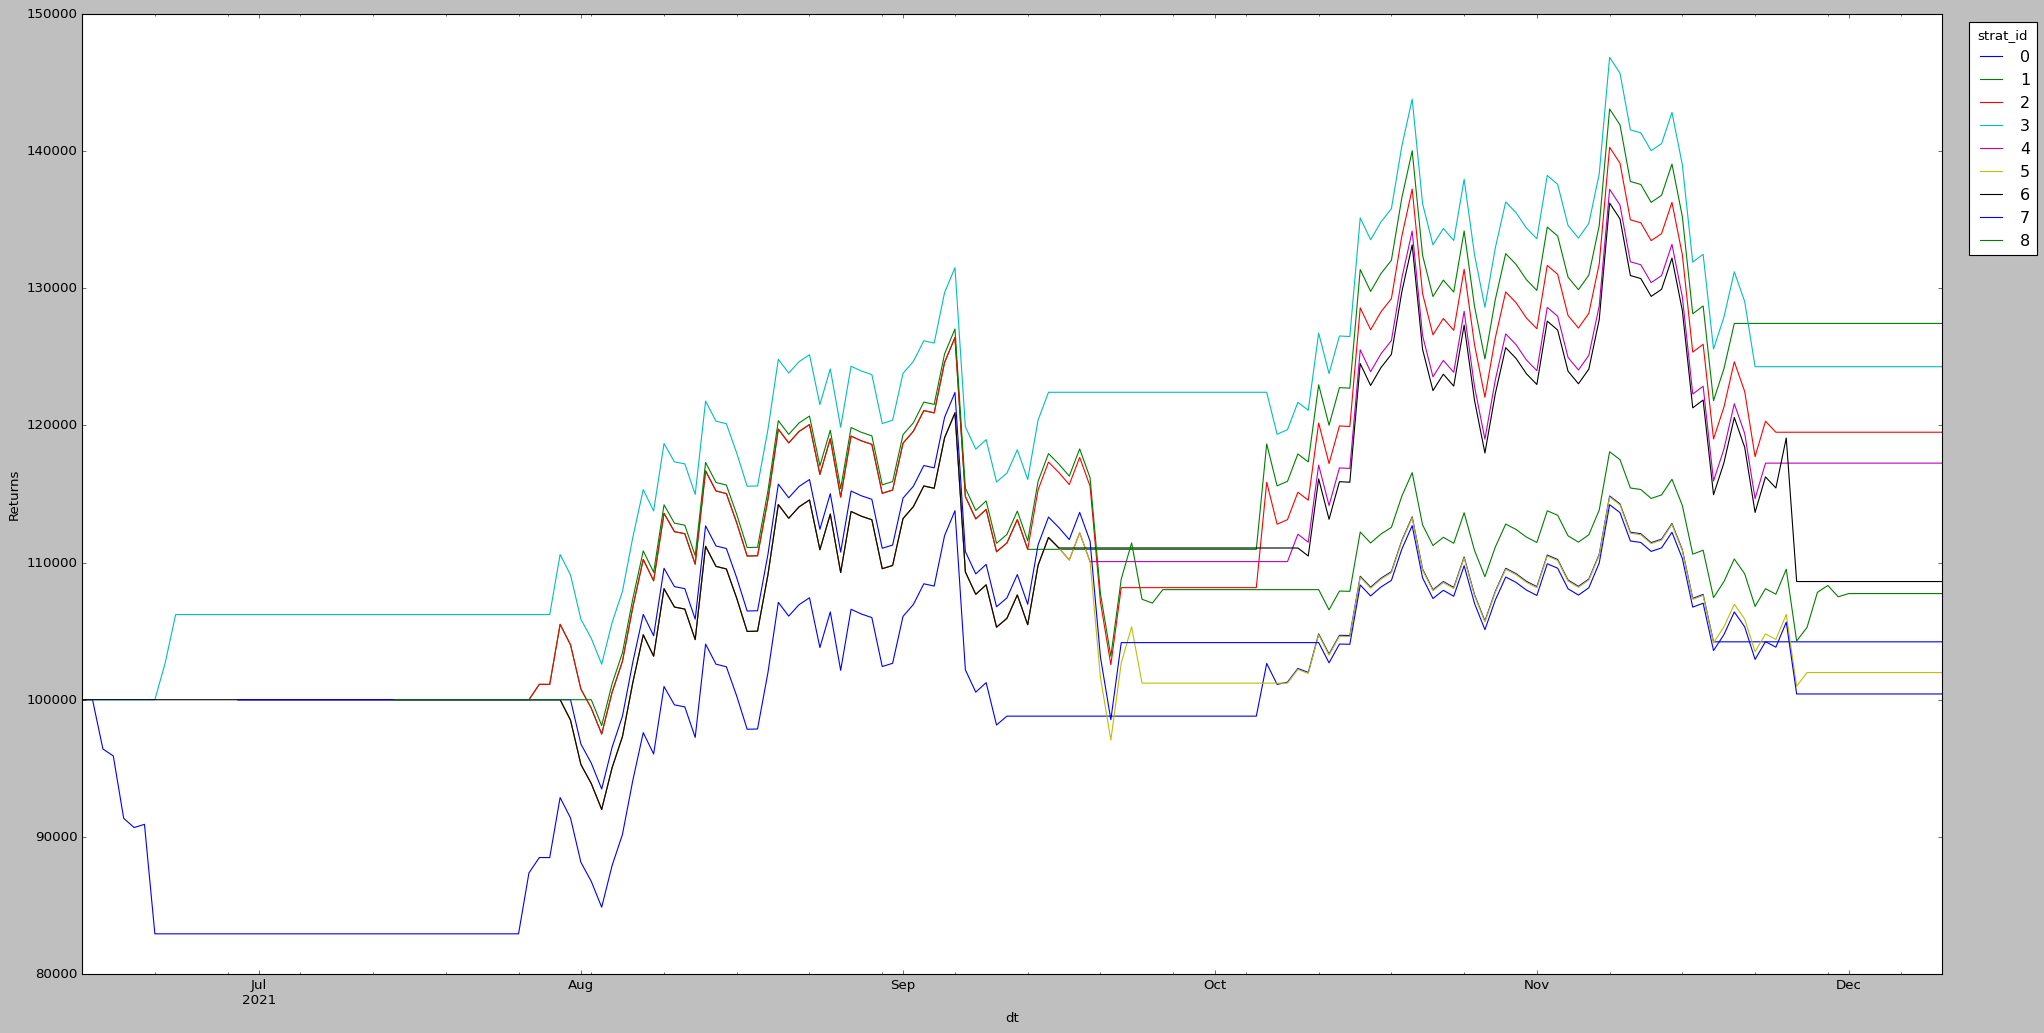

In [55]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

# Estratégia multi sinal

In [56]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2021-05-29T00:00:00, BUY CREATE, 34605.15
2021-05-29T00:00:00, Cash: 100000.0
2021-05-29T00:00:00, Price: 34605.15
2021-05-29T00:00:00, Buy prop size: 2.886856433221642
2021-05-29T00:00:00, Afforded size: 2.886856433221642
2021-05-29T00:00:00, Final siz

In [57]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.169868,0.000809,0.226104,22.610392,0,0.0,0.0,"{'len': 113, 'drawdown': 19.18390503216354, 'm...",19.183905,113,None,18514.84,118514.84,2,0.5,1,0,10828.82,10.82882,0.0,0.0,10828.82,10.82882,0.0,0.0


ROI de 18,50%

In [58]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [59]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2021-06-15T00:00:00, BUY CREATE, 40144.04
2021-06-15T00:00:00, Cash: 100000.0
2021-06-15T00:00:00, Price: 40144.04
2021-06-15T00:00:00, Buy prop size: 2.488541260423712
2021-06-15T00:00:00, Afforded size: 2.488541260423712
2021-06-15T00:00:00, Final siz

In [60]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower30',
        'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

In [61]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.256265,0.001220,0.360045,36.004543,32,13.851475,20775.08,"{'len': 45, 'drawdown': 19.18390503216354, 'mo...",19.183905,45,None,29209.52,129209.52,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.217380,0.001035,0.298041,29.804088,32,15.361933,22557.30,"{'len': 38, 'drawdown': 15.361933285544014, 'm...",15.361933,38,None,24281.64,124281.64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.188295,0.000897,0.253519,25.351852,32,14.979088,21268.42,"{'len': 55, 'drawdown': 15.93127952676336, 'mo...",15.931280,55,None,20719.00,120719.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.178180,0.000848,0.238395,23.839526,32,14.809812,20775.08,"{'len': 38, 'drawdown': 18.874021988091968, 'm...",18.874022,38,None,19504.08,119504.08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.169868,0.000809,0.226104,22.610392,0,0.000000,0.00,"{'len': 113, 'drawdown': 19.18390503216354, 'm...",19.183905,113,None,18514.84,118514.84,2,0.5,1.0,0.0,10828.82,10.82882,0.0,0.0,10828.82,10.82882,0.0,0.0
5,15,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.165091,0.000786,0.219095,21.909545,32,17.838997,25609.60,"{'len': 45, 'drawdown': 19.224483984495933, 'm...",19.224484,45,None,17950.04,117950.04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.151687,0.000722,0.199643,19.964333,0,0.000000,0.00,"{'len': 118, 'drawdown': 19.18390503216354, 'm...",19.183905,118,None,16379.58,116379.58,2,0.5,1.0,0.0,10828.82,10.82882,0.0,0.0,10828.82,10.82882,0.0,0.0
7,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.150315,0.000716,0.197670,19.767039,32,16.254308,22557.30,"{'len': 59, 'drawdown': 16.254308339631187, 'm...",16.254308,59,None,16220.06,116220.06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.119946,0.000571,0.154809,15.480870,0,0.000000,0.00,"{'len': 4, 'drawdown': 1.383324652401, 'moneyd...",1.383325,4,None,12743.55,112743.55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.048470,0.000231,0.059889,5.988883,0,0.000000,0.00,"{'len': 0.0, 'drawdown': 0.0, 'moneydown': 0.0}",0.000000,0,None,4966.39,104966.39,1,NaN,NaN,NaN,NaN,

Melhor ROI foi 29,21%